### 7.13 with martin 

In [1]:
import scanpy as sc

In [2]:
exp=sc.read_10x_mtx("/wrk/jacky/organoid/counts/expression_counts/outs/filtered_feature_bc_matrix")
exp

AnnData object with n_obs × n_vars = 8240 × 32285
    var: 'gene_ids', 'feature_types'

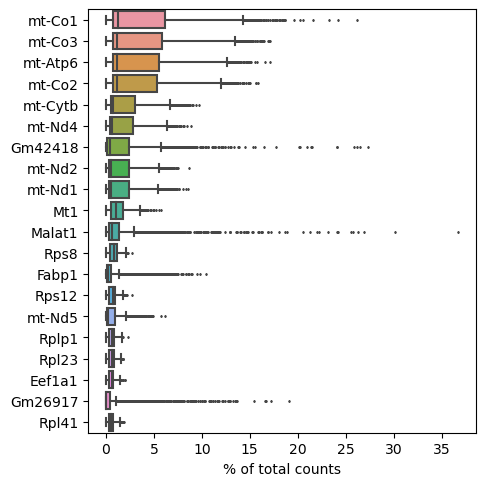

In [3]:
sc.pl.highest_expr_genes(exp, n_top=20, )

In [4]:
exp

AnnData object with n_obs × n_vars = 8240 × 32285
    var: 'gene_ids', 'feature_types'

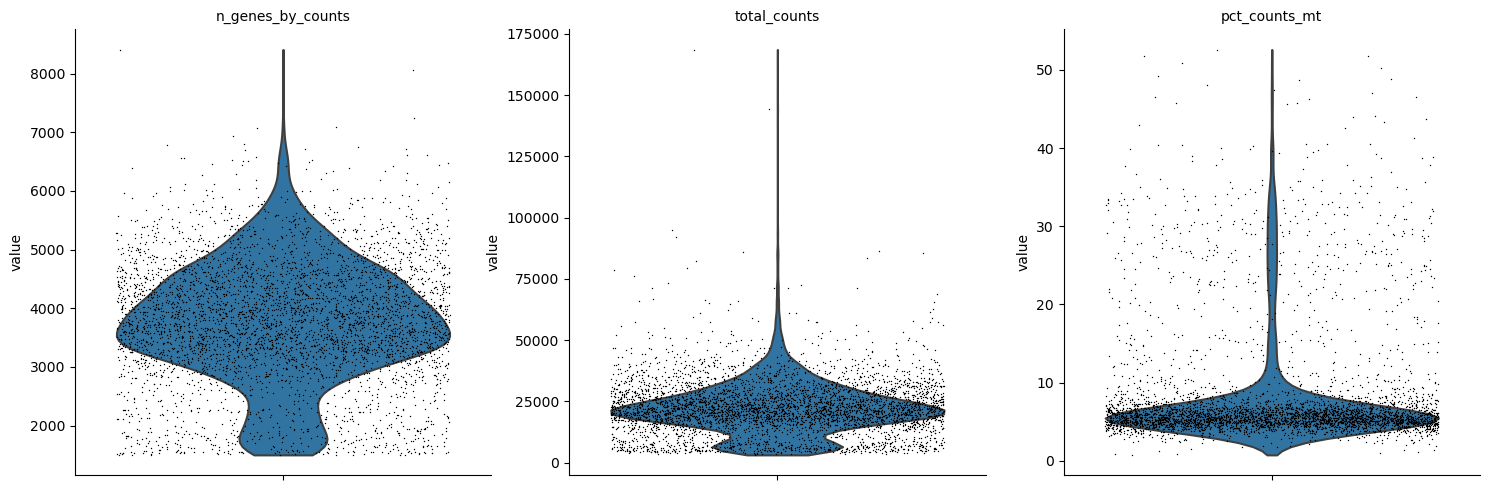

In [5]:
#preprocess the expression data
sc.pp.filter_cells(exp, min_genes=1500)
sc.pp.filter_genes(exp, min_cells=3)

exp.var['mt'] = exp.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(exp, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(exp, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],jitter=0.4, multi_panel=True)

In [6]:
#filter total_counts smaller than 5000
exp = exp[exp.obs.total_counts > 2800, :]
exp=exp[exp.obs.total_counts > 10000, :]
exp=exp[exp.obs.pct_counts_mt<8, :]

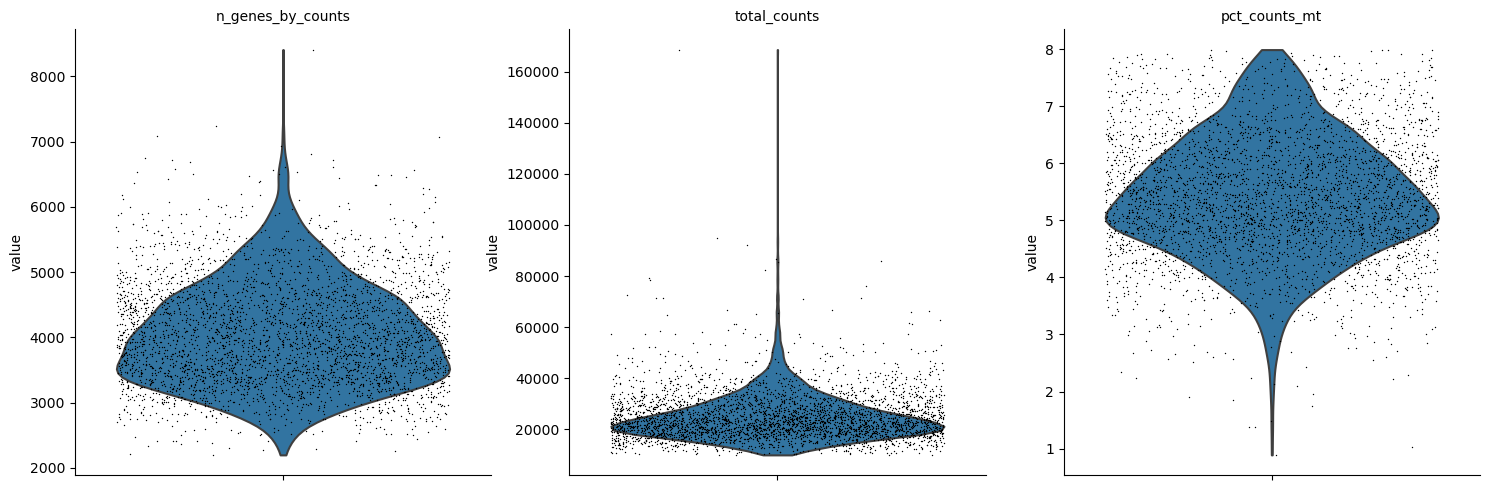

In [7]:
sc.pl.violin(exp, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],jitter=0.4, multi_panel=True)

In [8]:
exp

View of AnnData object with n_obs × n_vars = 3623 × 16771
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

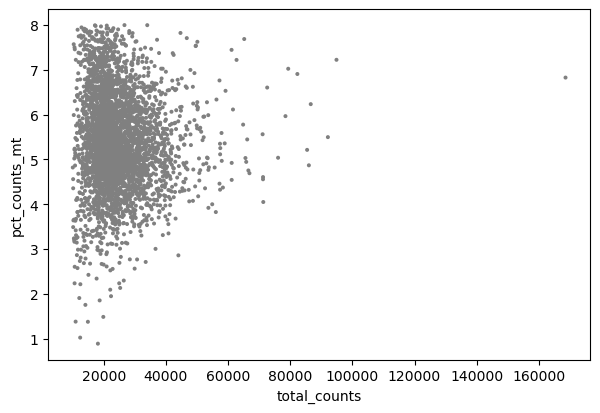

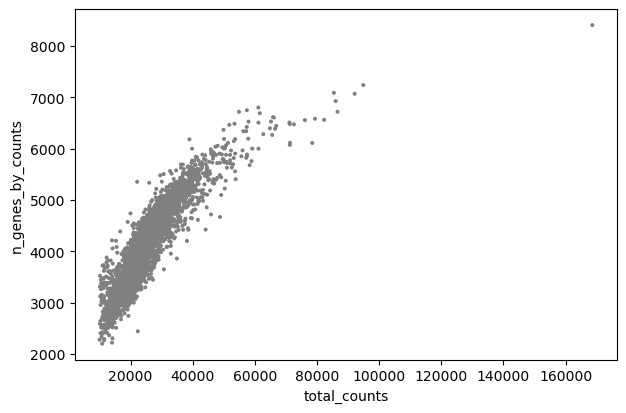

In [9]:
sc.pl.scatter(exp, x='total_counts', y='pct_counts_mt')

sc.pl.scatter(exp, x='total_counts', y='n_genes_by_counts')

In [10]:
sc.pp.normalize_total(exp, target_sum=1e4)


/home/jacky/miniconda2/envs/jacky/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [11]:
sc.pp.log1p(exp)


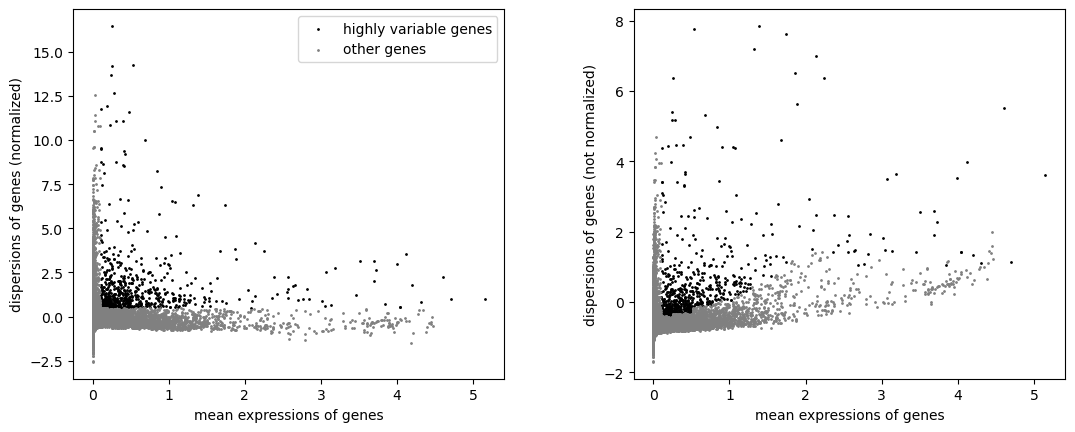

In [12]:
sc.pp.highly_variable_genes(exp, min_mean=0.1, max_mean=10, min_disp=0.5)

sc.pl.highly_variable_genes(exp)

In [13]:
#filter the expression data
exp2 = exp[:, exp.var.highly_variable]

In [14]:
sc.pp.scale(exp, max_value=10)

In [15]:
sc.tl.pca(exp, svd_solver='arpack')

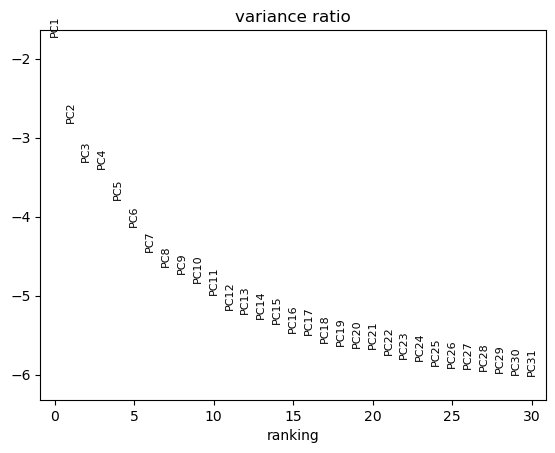

In [16]:
sc.pl.pca_variance_ratio(exp, log=True)

In [17]:
sc.pp.neighbors(exp, n_neighbors=15, n_pcs=21)


2023-07-18 15:10:38.688979: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-18 15:10:38.723425: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-18 15:10:38.724299: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-18 15:10:39.400011: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [18]:
# show umap
sc.tl.umap(exp)

In [19]:
#do louvain clustering
sc.tl.louvain(exp)

/home/jacky/miniconda2/envs/jacky/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


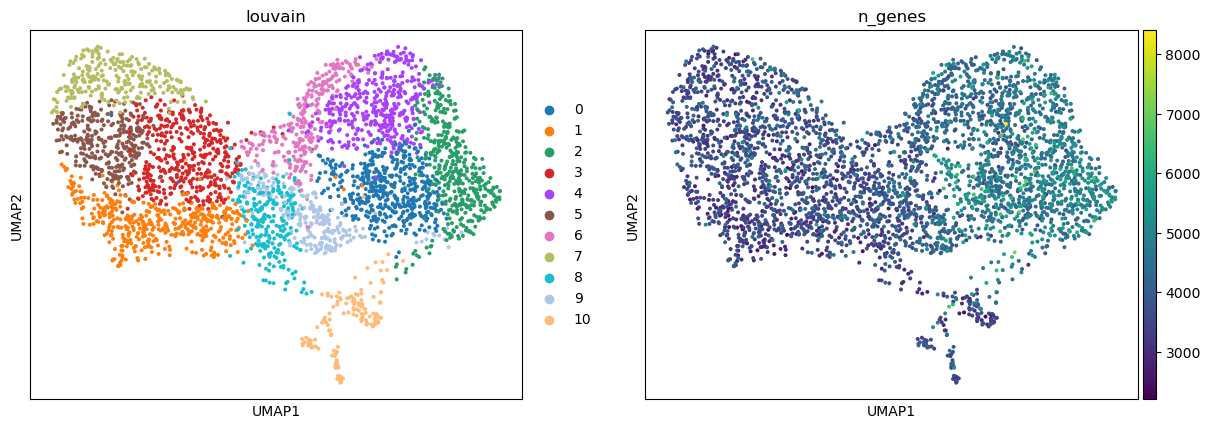

In [20]:
#show umap plot for louvain clustering and n_genes
sc.pl.umap(exp, color=['louvain','n_genes'])

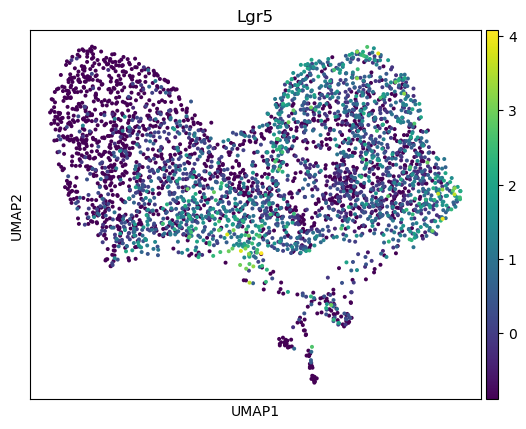

In [21]:
# SHOW Lgr5 in umap and n of features
sc.pl.umap(exp, color=['Lgr5'])

In [22]:
'Dclk1' in exp.var_names

True

KeyError: 'Could not find key Defa5 in .var_names or .obs.columns.'

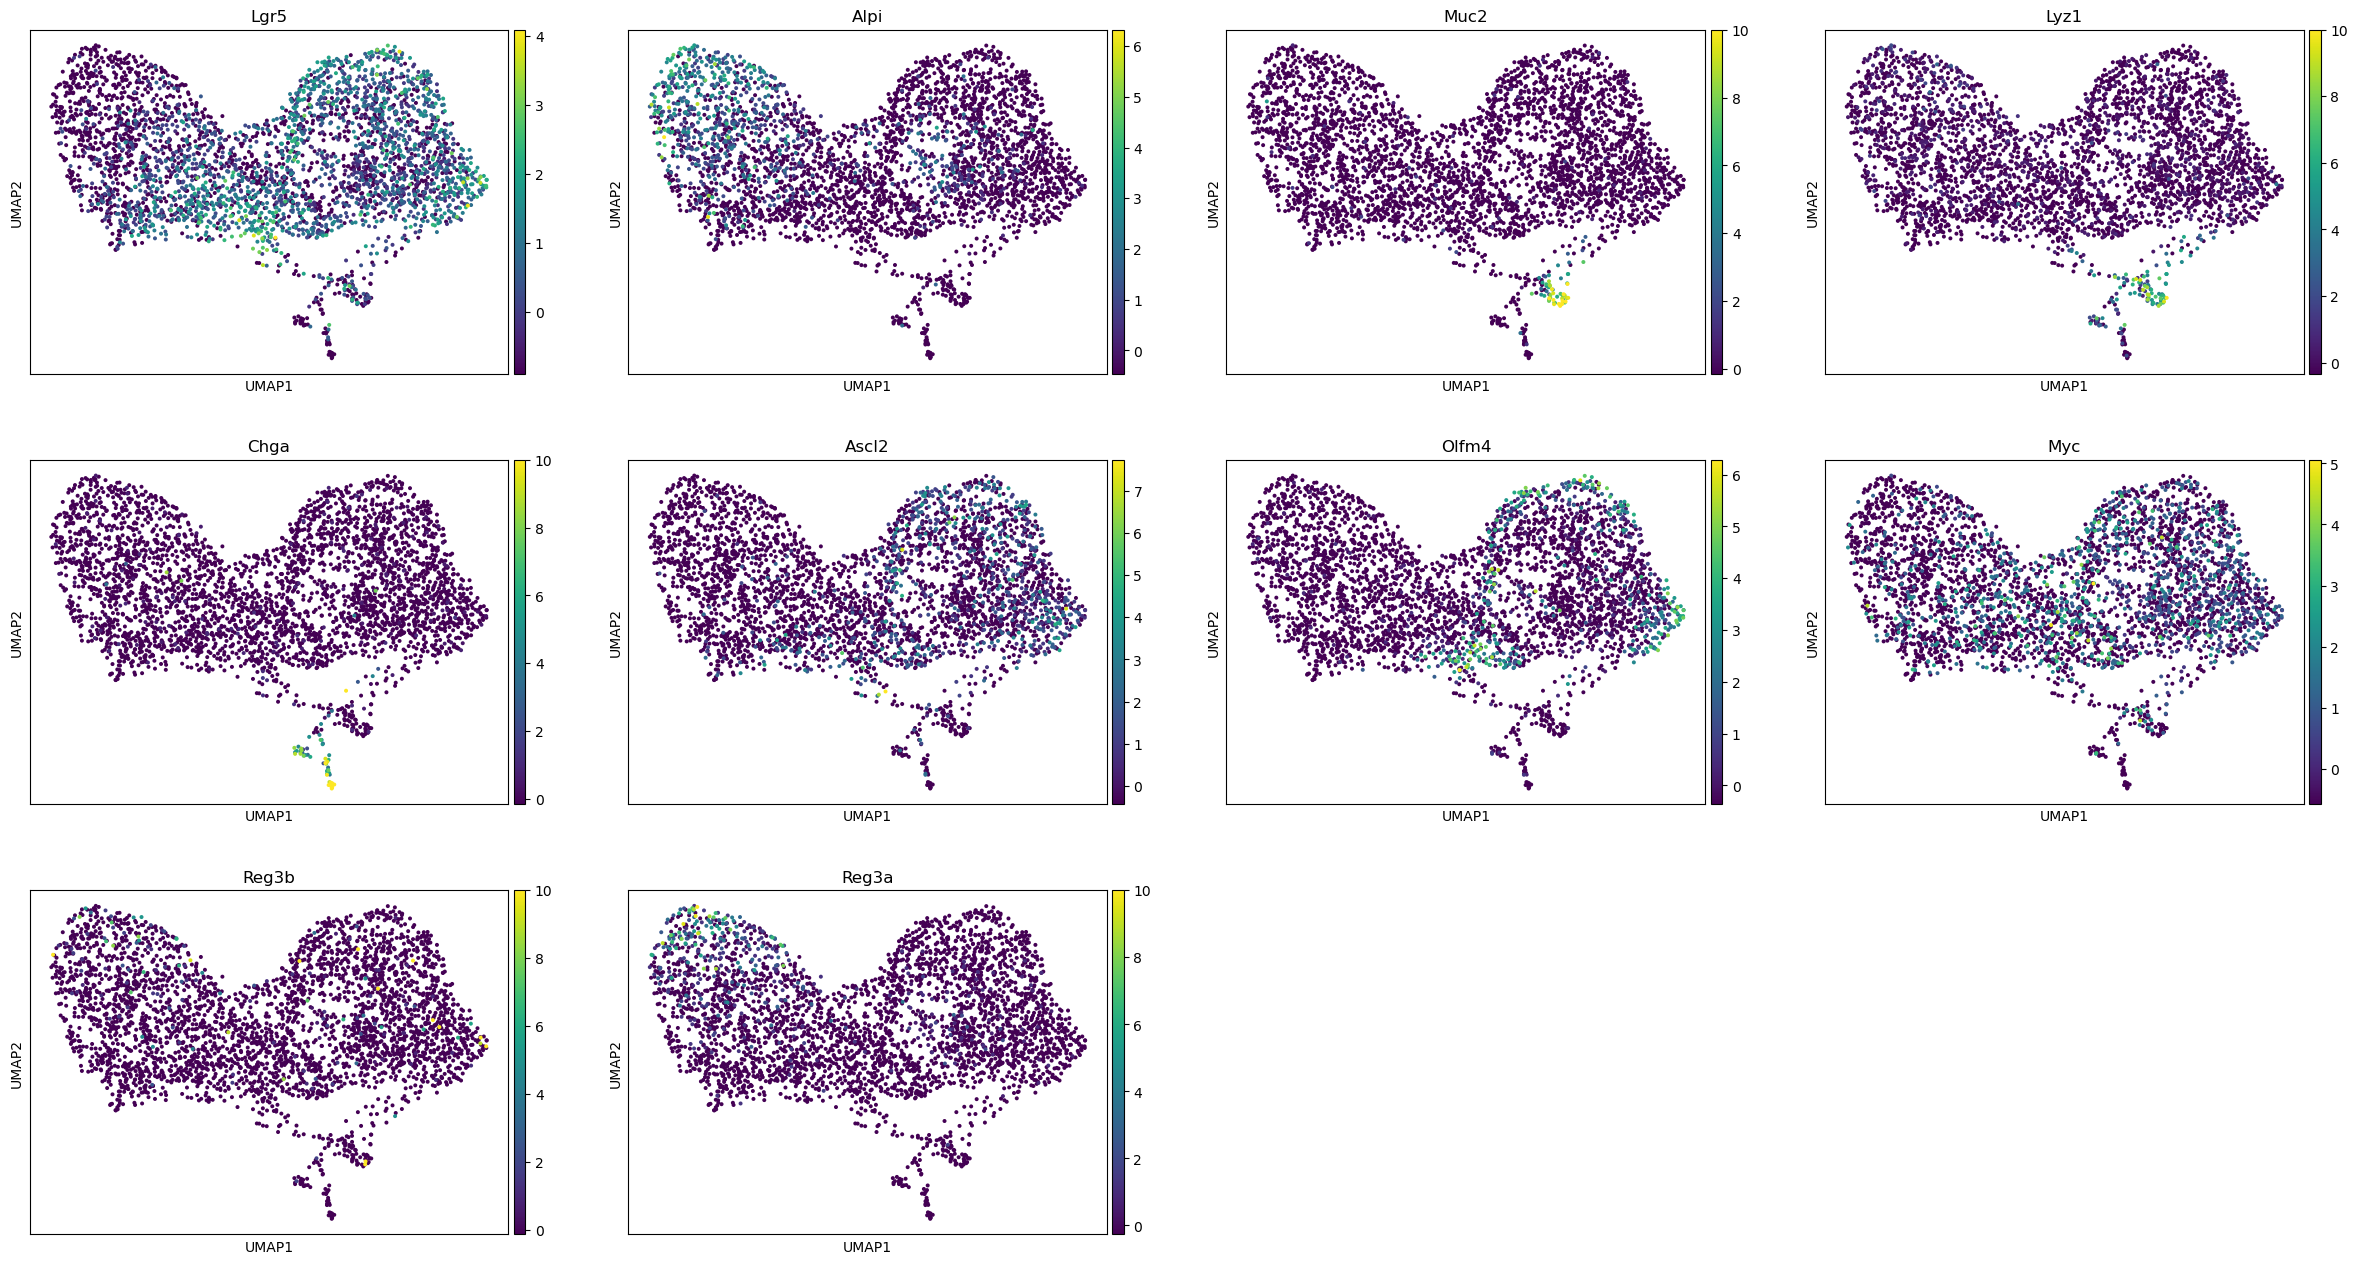

In [23]:
#plot Alpi, Muc2 and Lyz1
sc.pl.umap(exp, color=['Lgr5','Alpi','Muc2','Lyz1','Chga','Ascl2','Olfm4','Myc','Reg3b','Reg3a','Defa5'])

In [ ]:
'Defa5' in exp.var_names

False

/home/jacky/miniconda2/envs/jacky/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


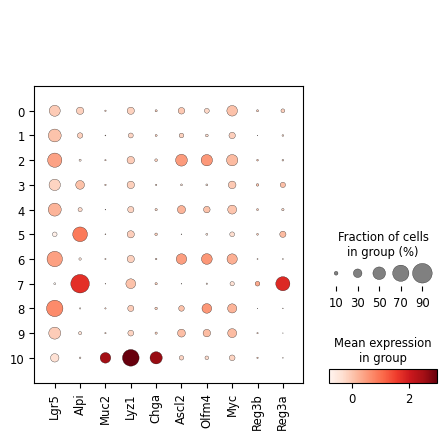

In [ ]:
#dotplot 
sc.pl.dotplot(exp, ['Lgr5','Alpi','Muc2','Lyz1','Chga','Ascl2','Olfm4','Myc','Reg3b','Reg3a'], groupby='louvain')

In [25]:
# save as h5ad file
exp.write_h5ad("/wrk/jacky/organoid/counts/expression_counts/outs/filtered_feature_bc_matrix/filtered_feature_bc_matrix.h5ad")

KeyError: 'Could not find key  in .var_names or .obs.columns.'

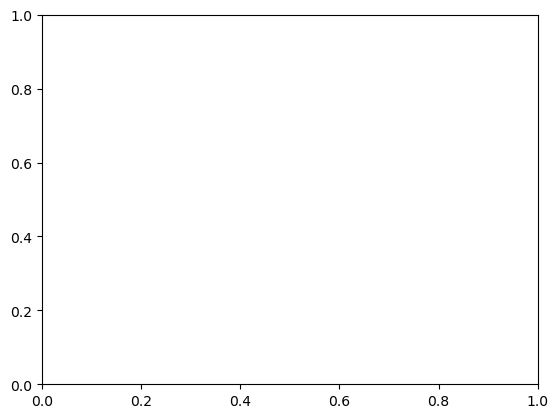

In [24]:
a=input("Enter the gene name: ")
sc.pl.umap(exp, color=[a])
sc.pl.dotplot(exp, a, groupby='louvain')